# Homework 3: Random Variables and Their Distributions
***

**Name**: 

***

This assignment is due on Moodle by **5pm on Friday March 2nd**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.  For a refresher on the course **Collaboration Policy** click [here](https://github.com/dblarremore/csci3022/blob/master/resources/syllabus.md#collaboration-policy).  

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

### Work only 4 of the 5 problems below! Your choice.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy.special import binom
%matplotlib inline

### [25 points] Problem 1
***

Let $X$ be the lifespan (in years) of a BF Otterich Rugged Trail T/A tire under normal driving conditions, and suppose $X$ is described by the following probability density function: 

$$
f(x) = \left\{ 
\begin{array}{ll}
\dfrac{15}{c x^3} & 1 \leq x \leq 15 \\
0 & \textrm{otherwise}
\end{array}
\right.
$$

**Part A**: Determine the value of $c$ such that $f(x)$ is a valid PDF. 

$ \int_{1}^{15} \frac{15}{cx^{3}}dx = \frac {15}{c}\int_{1}^{15} x^{-3}dx = \frac{15}{c} * [\frac{-1}{2}x^{-2} ]\Big|_1^{15}$

$ = \frac{15}{c} [\frac{-1}{2 \cdot 225} - \frac{-1}{2}] = 1 $  **We need this to equal 1**

$ = \frac{15}{c} [\frac{112}{225}] = 1 $

$ c = 15 [\frac{112}{225}]$

$c = \frac{112}{15}$  **YAY**

Thus: $\int_{1}^{15} \frac{225}{112\  x^{3}}dx = 1$

**Part B**: Compute the cumulative distribution function $F(y)$ for $X$. 

$F(y) = \int_1^y \frac{225}{112\  x^3}dx = \frac{225}{112} \int_1^y x^3 dx $

$ = \frac{225}{112} \cdot [\frac{-1}{2}x^{-2}]\Big|_1^{y} = \frac{225}{112} [\frac{1}{2} - \frac{1}{2y^2}] $

$F(y) = \frac{225}{224} - \frac{225}{224y^2}$ **This is the CDF**

**Part C**: Use the cdf you computed in **Part B** to find the probability that a single tire goes longer than 5 years without failing. 

Probability that it lasts longer than 5 years $= F(15) - F(5)$

$F(15) = \frac{225}{224} - \frac{225}{224 (15)^2}) = 1$

$F(5) = \frac{225}{224} - \frac{225}{224\ \cdot\ 25} = .964$

Probability that it lasts longer than 5 years $= F(15) - F(5) = 1-.964 = 3.6\% $ **chance that it lasts longer than 5 years**

**Part D**: Use the cdf you computed in **Part B** to determine the number of years within which $62.5\%$ of all tires will need to be replaced. In other words, determine the 62.5th percentile of the distribution of $X$. 

$ .625 = \frac{225}{224} - \frac{225}{224y^2}$

$= 1.62$ **years until 62.5% of tires needs replacing***

**Part E**: What is the probability that all four BF Otterich Rugged Trail T/A tires on a vehicle last longer than 5 years without failing? 

$(1-.964)^4 = .0000167 $ **chance that all four tires last 5 years...  OUCH!***

### [25 points] Problem 2
***

You are a data-driven transportation engineer investigating the effect that a particular [vertical lift bridge](https://en.wikipedia.org/wiki/Vertical-lift_bridge) has on city traffic.  Every time a boat passes under the bridge, cars must stop while the bridge is raised to accommodate the height of the boat.  As both boat and car traffic increases, city planners are considering building a new taller bridge that will never impede the flow of traffic. As part of a larger simulation of traffic congestion, you need to decide how to model the arrival of boats at the bridge.  From your Intro to Data Science class you remember that the time _between_ independent arrivals are usually modeled by an Exponential distribution.  Finally, you have access to a report that says on average 10 boats cross under the bridge per day.

Answer the following questions about this scenario. **Note** that for **Parts B-D** you should clearly express the computation you're doing with math, but feel free to do any fancy function evaluations with Python. 

**Part A**:  Assuming the between-boat times do in-fact follow $Exp(10)$, what distribution would you expect the **number** of boats that cross under the bridge on a given day to follow?  What are the parameter(s) of the distribution? 

***Poisson Distribution for number of boats: ***

$P(k) = \frac{\lambda^k}{k!}e^-{\lambda} $ 

***parameters of distribution:*** 

$ \lambda = 10, x = \text{random variable representing # of boats} $ 

**Exponential distribution(for time between boats):** 

$f(x) = \lambda e^{-\lambda x}$

$E[x] = \int_0^\infty x  f(x)dx =  \int_0^\infty x  \lambda e^{-\lambda x}dx = 1/\lambda $ ***expectation time between*** $1/10$ **1 boat every 10th of a day**




**Part B**:  What is the probability that 13 boats cross under the bridge on a particular day?

$P(x = 13) = \frac{10^{13}}{13!}e^{-10} = .0729 = 7.29\%$ **probability that 13 boats cross under the bridge**



**Part C**:  What is the probability that 8 boats or fewer cross under the bridge on a particular day?

**change to sum**

$P(x <= 8) = \sum_0^8 \frac{10^{x}}{x!}e^{-10} = .3328 = 33.3\%$ **probability that 8 or fewer boats cross under the bridge**

**Part D**: What is the probability that between 2 and 4 hours pass between two boat crossings? 

***Exponential distribution(for time between boats):*** $f(x) = \lambda e^{-\lambda x}$

$\lambda = 10/24$ boats per hour $x = 2,4$ hours

$\int_2^4 f(x)dx$

$\int_2^4 \lambda e^{-\lambda x}$

$=\int_0 ^ \infty \frac{10}{24} e^{-\frac{10}{24} x} = 1$ **good!**

$=\int_2 ^ 4 \frac{10}{24} e^{-\frac{10}{24} x} = .245 = 24.5\%$ **probability that 2-4 hours between the two boats crossing**

**Part F**: Write a function boat_count that takes as its sole argument the rate parameter $\lambda$ with units boats per day. Your function should simulate boat arrivals at the bridge by sampling between-boat times from $Exp(\lambda)$ via Numpy's [random.exponential](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.exponential.html) function and return the number of boats that pass under the bridge on a single simulated day. 

**Note**: Do not change the API for this function. In other words, please keep the name of the function, its input parameter, and its desired output the same. Of course, the inner workings of this function and the actual value that it returns are in your hands!

In [8]:
#change this into a discrete problem by adding up the time intervals! :P
def boat_count(lam):
    t=1
    boats = 0
    while(t>0):
        t-= np.random.exponential(1/lam)
        if(t>0): #fix, in case t ends up being negative, we dont want to add a boat!
            boats +=1
    return boats
boat_count(10)

11

**Part G**: Write a function boat_count_sim that takes as arguments the rate parameter $\lambda$ with units boats per day and an integer number of days to simulate. Your function should use the function you wrote in **Part F** to simulate many independent days of boat crossings and estimate the probability that 8 boats or fewer cross under the bridge on a particular day. For $\lambda = 10$, does your estimate agree with the by-hand computation you did in **Part C**?  

**Note**: Do not change the API for this function. 

In [9]:
def boat_count_sim(lam, num_days=int(1e3)):
    boat_count_arr = np.array([boat_count(lam) for i in range(num_days)])
    days_lt_8 = np.array([boat_count_arr <= 8])
    print("{} average number of boats per day sampled {} days:".format(boat_count_arr.sum()/num_days, num_days))
    return days_lt_8.sum()/num_days 
print("Answer: {}% probability that 8 or fewer boats cross".format(boat_count_sim(10, num_days = 10000)*100))

10.0317 average number of boats per day sampled 10000 days:
Answer: 33.050000000000004% probability that 8 or fewer boats cross


**Part H**: Write a function boat_time_sim that takes as arguments the rate parameter $\lambda$ with units boats per day and an integer number of boat arrivals to simulate. Your function should sample boat arrivals via [np.random.exponential](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.exponential.html) and estimate the probability that boats arrive between 2 and 4 hours apart.  For $\lambda = 10$, does your estimate agree with the by-hand computation you did in **Part D**?  

**Note**: Do not change the API for this function.  

In [6]:
#here I am assuming that if say 2 boats arrived on a day, then they were 12 hours apart, this should work
def boat_time_sim(lam, num_boats=int(1e3)):
    boats_time_arr = np.array([24/np.random.exponential(lam) for i in range(num_boats)])
    boats_2 = np.array([boats_time_arr >= 2])
    #print(boats_2)
    boats_4 = np.array([boats_time_arr <= 4])
    boats_2_to_4 = np.array([boats_2 == boats_4])
    return boats_2_to_4.sum()/num_boats

#This one matches my answer above. 
print("{:.3f}% probability that time between boats is 2 to 4 hours".format(boat_time_sim(10, 100000)*100))

24.584% probability that time between boats is 2 to 4 hours


### [25 points] Problem 3 
***

Let $X =$ the leading digit of a randomly selected number from a large accounting
ledger. For example, if we randomly draw the number \$20,695, then $X = 2.$
People who make up numbers to commit accounting fraud tend to give $X$ a
(discrete) uniform distribution, i.e., $P(X = x) = \frac{1}{9}$, for $x \in \{1, ..., 9\}$. However,
there is empirical evidence that suggests that _naturally occurring_ numbers (e.g.,
numbers in a non-fraudulent accounting ledgers) have leading digits that do not
follow a uniform distribution. Instead, they follow a distribution defined by the following probability mass function:

$$
f(x) = \log_{10}\left( \frac{x+1}{x} \right) \quad \textrm{for } x = 1, 2, \ldots, 9
$$

**Part A**: Write a function pmf_natural that implements $f(x)$. Your function should take in an integer $x$ and return $f(x) = P(X = x)$.  Use your function to argue that $f(x)$ is a well-defined probability mass function. 

In [5]:
def pmf_natural(x):
    #print(np.log10((x+1)/x))
    return np.log10((x+1)/x)


'''
to argue that this is a good valid, well defined PMF, the sum of inputs x should add up to 1
'''
PMF =  np.array([pmf_natural(i) for i in range(1,10)])
sumPMF = PMF.sum()
print("The sum of all inputs x, adds up to {:.1f} which argues the PMF is well defined and valid.".format(sumPMF))

The sum of all inputs x, adds up to 1.0 which argues the PMF is well defined and valid.


**Part B**: Use the function you wrote above to make stacked bar plots describing the pmf of the naturally occurring numbers as well as the discrete uniform distribution.  Make sure that the $x$- and $y$-limits on your plots are the same so that the two distributions are easy to compare. 

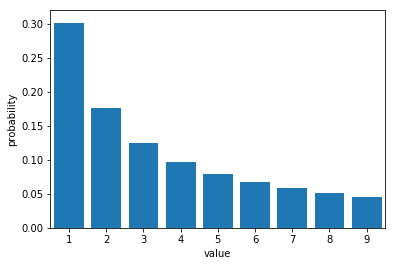

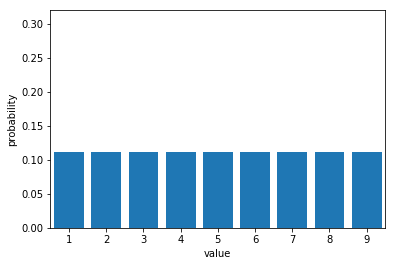

In [6]:
#fig, ax = plt.subplots(nrows = 1, ncols=1, figsize= (10,10))

x_arr = [1,2,3,4,5,6,7,8,9]
plt.bar(x_arr, PMF)
plt.xlabel("value")
plt.ylabel("probability")
plt.xlim([.5, 9.5])
plt.ylim([0,.32])
plt.show()

x_unnatural = [1/9]*9
plt.bar(x_arr, x_unnatural)
plt.xlabel("value")
plt.ylabel("probability")
plt.xlim([.5, 9.5])
plt.ylim([0,.32])
plt.show()


**Part C**: Write a function cdf_natural that implements the cumulative distribution function $F(y)$ for $X$ and use it to compute the probability that the leading digit in a number is at most 4 and at most 5. 

In [7]:
def cdf_natural(y):
    CDF = np.array([pmf_natural(i) for i in range(1,y+1)])
    return CDF.sum()

print("CDF(4) = {}".format(cdf_natural(4)))
print("CDF(5) = {}".format(cdf_natural(5)))


CDF(4) = 0.6989700043360189
CDF(5) = 0.7781512503836436


**Part D**: The data in tax_data.txt contains the taxable income for individuals in 1978. Use Pandas and the information from **Parts A-D** to determine whether or not the dataset is likely fraudulent.  In addition to code and any graphical summaries, make sure to clearly justify your conclusion in words. 

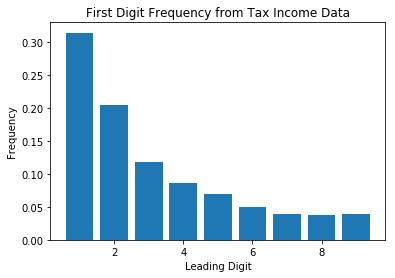

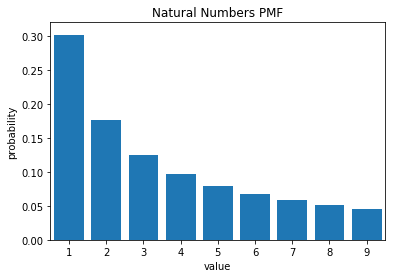

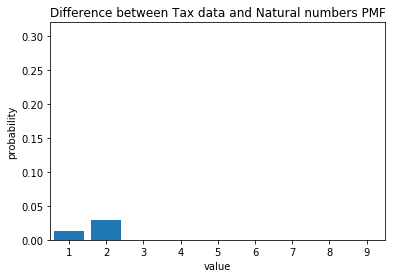

In [8]:
df = pd.read_csv('tax_data.txt', delim_whitespace=True).astype("str")
df.head()
df.dtypes
arr = []
for line in df["Tax Incomes"]:
    line = str(line)
    arr.append(int(line[0]))
df["first"] = arr
df.head()

arr_sums = [0]*9
for i in range(1,10):
    arr_sums[i-1] = df.loc[df['first'] == i, "first"].sum() / i / len(df)
    #print(i)
#print(arr_sums)
    

plt.bar(x_arr, arr_sums)
plt.title("First Digit Frequency from Tax Income Data")
plt.xlabel("Leading Digit")
plt.ylabel("Frequency")
plt.show()


plt.bar(x_arr, PMF)
plt.title("Natural Numbers PMF")
plt.xlabel("value")
plt.ylabel("probability")
plt.xlim([.5, 9.5])
plt.ylim([0,.32])
plt.show()

plt.bar(x_arr, arr_sums - PMF)
plt.title("Difference between Tax data and Natural numbers PMF")
plt.xlabel("value")
plt.ylabel("probability")
plt.xlim([.5, 9.5])
plt.ylim([0,.32])
plt.show()

** There is a chance that some values were inserted that started with 1 or 2. However, I think that this could just be from variation. I conclude that from this data I don't have enough evidence to say that the tax data is fraudulent since it does not show a uniform distribution as the difference, nor does the tax data follow a unirofm distribution. **

** **

### [25 points] Problem 4
***

You are the team manager for the CU intramural Quidditch team, the Boulder Beaters, and you've just made it to the national championship series against the Stanford Snitching Snitches. The typical Quidditch championship is a best of 11 series, so the first team to win 6 matches is declared the winner.  Furthermore, based on a rigorous statistical analysis of regular season play, the probability that the Boulder Beaters win any one match against the Snitching Snitches is given by $p = 0.55$.  

**Part A**: What is the probability that you win the 11-game series on the 8th match played? 


**Part B**: What is the probability that you win the 11-game series in any valid number of matches? 

**Part C**: The winner of the champsionship will take home \$10,000 to use for equipment and victory parties in the following season. Because the stakes are so high, you've decided to hire a famous Quidditch consultant, Bludger Bob, to help you prepare for each match. With Bob's help your probability of winning any given match increases to $p = 0.7$.  Bludger Bob charges a fee of \$100 per game, but as a testament to his confidence in his abilities, only charges you the \$100 for games that you win and only if you win the series.  So, if you play a 11-game series and win you will take home \$10,000 less \$600 for Bludger Bob's fees, for a total payout of \$9,400.  What is the expected payout for an 11-game series?   

**Part D**: This year the National Intramural Quidditch Association (NIQA) is implementing an experimental rule.  As the team with the best record in the regular season you will get to choose the length of the championship series.  Specifically, you can choose the series length to be anywhere from $N=3, 5, 7, \ldots, 99$ games long.  Assuming that you plan to use Bludger Bob's services and considering the fact that you have a better than even chance of winning each game, explain the trade-offs between choosing a short series vs. a long series in terms of Expected Payout. 


**Part E**: Write a function optimal_series that takes in $p$, the probability that your team wins an individual game, then computes the Expected Payout for each series of length $N=3, 5, 7, \ldots 99$ and returns the optimal series length.  In addition to returning the optimal series length, your function should also produce a plot of Expected Payout vs Series Length. You may write any additional helper functions that you like, but you should not change the API for the function optimal_series. 

In [9]:
def optimal_series(p):
    return 1

### [25 points] Problem 5
***

The card game "War" is fun for small children. The basic rules are [here](https://www.bicyclecards.com/how-to-play/war/), but see the list below. Assume that the value of each card in the deck, in decreasing order, is A K Q J 10 9 8 7 6 5 4 3 2. For example, Q is of higher value than J. 

Create a simulation of the game War. Your simulation must:

- initialize a single deck of 52 standard cards, shuffled.
- deal half of those cards to each player.
- simulate the game of War between two players until one player has all 52 cards, while recording the number of rounds that have passed.
- for counting purposes, a round ends when the winner places cards on the bottom of their stack. 
- if a player runs out of cards mid-War, that player loses. 
- when cards are collected to be placed at the bottom of a deck, they are scraped from the table in a way that randomly shuffles them.  

**Part A**: For any fixed order of the cards, the game is completely non-random. This means that shuffling the deck randomly makes the duration of the game a random variable. Use your simulation to compute the expected value of the duration of a game of war. 

In [15]:
p1 = {}
p2 = {}
win_collected = {}
values = {
"KC": 13,"QC": 12,"JC":11,"10C":10,"9C":9,"8C":8,"7C":7,"6C":6,"5C":5,"4C":4,"3C":3,"2C":2,"AC":14,
"KD": 13,"QD": 12,"JD":11,"10D":10,"9D":9,"8D":8,"7D":7,"6D":6,"5D":5,"4D":4,"3D":3,"2D":2,"AD":14,
"KH": 13,"QH": 12,"JH":11,"10H":10,"9H":9,"8H":8,"7H":7,"6H":6,"5H":5,"4H":4,"3H":3,"2H":2,"AH":14, 
"KS": 13,"QS": 12,"JS":11,"10S":10,"9S":9,"8S":8,"7S":7,"6S":6,"5S":5,"4S":4,"3S":3,"2S":2,"AS":14
}

#deck = {"cards": values, "p1": p1, "p2": p2, "win": win_collected}
rounds = 0


#initialize the game with 2 player decks each having 26 random cards
def war_init(p1, p2, values):
    while(len(values) > 0):
        face = np.random.choice(list(values.keys()), p = [1/len(values)]*len(values))
        val = values.pop(face)
        insert(p1, face, val)
        face = np.random.choice(list(values.keys()), p = [1/len(values)]*len(values))
        val = values.pop(face)
        insert(p2, face, val)
    #print(len(p1), len(p2))
    return p1, p2

def refill(deck, win_pile):
    while(len(win_pile.items())>0):
        face = np.random.choice(list(win_pile.keys()), p = [1/len(win_pile)]*len(win_pile))
        val = win_pile.pop(face)
        insert(deck, face, val)
    return 1

def insert(deck, card_face, card_value):
    deck[card_face] = card_value
    return 0
    
def war(p1_face, p1_val, p2_face, p2_val, p1, p2, win, rounds):
    #if they have at least 4 cards
    insert(win, p1_face, p1_val)
    insert(win, p2_face, p2_val)
    if(len(p1)<2  or len(p2)<2):
        #send the remaining cards to winner
        if(len(p1)<len(p2)):
            rounds += refill(p2, p1)
            refill(p2, win) #dont double count rounds here
        else:
            rounds += refill(p1, p2)
            refill(p1, win)
            
    else:
        #burn 1 cards into win_pile
        p1_face = np.random.choice(list(p1.keys()), p = [1/len(p1)]*len(p1)) #choose a card p1
        p1_val = p1.pop(p1_face)
        p2_face = np.random.choice(list(p2.keys()), p = [1/len(p2)]*len(p2)) #choose a card p2
        p2_val = p2.pop(p2_face)
        insert(win, p1_face, p1_val)
        insert(win, p2_face, p2_val)
    return rounds

def play(p1,p2,win,values,rounds):
    #don't edit the original dictionary values, make a copy first!
    deck = values.copy()
    #split evenly and randomly
    war_init(p1,p2,deck) 
    while((len(p1) > 0) and (len(p2) > 0)):
        #i know this isnt the top of the deck, but it will not affect my expected value...
        p1_face = np.random.choice(list(p1.keys()), p = [1/len(p1)]*len(p1)) #choose a card p1
        p1_val = p1.pop(p1_face)
        p2_face = np.random.choice(list(p2.keys()), p = [1/len(p2)]*len(p2)) #choose a card p2
        p2_val = p2.pop(p2_face)
        #print(p1_card, p1[p1_face], p2_card, p2[p2_face])
        if(p1_val > p2_val):
            insert(win, p1_face, p1_val)
            insert(win, p2_face, p2_val)
            rounds += refill(p1, win)
        elif(p1_val < p2_val):
            insert(win, p1_face, p1_val)
            insert(win, p2_face, p2_val)
            rounds += refill(p2, win)
        elif(p1_val == p2_val):
            rounds = war(p1_face, p1_val, p2_face, p2_val, p1, p2, win, rounds)
        else:
            print("error")
    #if(len(p1)>len(p2)):        
    #    print("p1 wins in {} rounds with {} cards in their deck: {}".format(rounds, len(p1), sorted(p1)))
    #else:
    #    print("p2 wins in {} rounds with {} cards in their deck: {}".format(rounds, len(p2), sorted(p2)))
    return(rounds)
        
        
play(p1,p2,win_collected,values, 0)

def war_sim(p1, p2, win, values, num_games):
    arr = np.array([play(p1,p2,win,values, 0) for i in range(num_games)])
    return arr.sum()/num_games
print("Expected number of rounds: {}".format(war_sim(p1, p2, win_collected, values, 1000)))



#475.6 @ 1000

Expected number of rounds: 475.548


**Expected number of rounds: 472(1000 samples) rounds for the game of war to end. That is a long game average!**

**Part B**: What happens to the expected duration if the K, Q, and J cards are all now assumed to have _equal_ rank?

In [1]:
values_KQJ = {
"KC": 11,"QC": 11,"JC":11,"10C":10,"9C":9,"8C":8,"7C":7,"6C":6,"5C":5,"4C":4,"3C":3,"2C":2,"AC":14,
"KD": 11,"QD": 11,"JD":11,"10D":10,"9D":9,"8D":8,"7D":7,"6D":6,"5D":5,"4D":4,"3D":3,"2D":2,"AD":14,
"KH": 11,"QH": 11,"JH":11,"10H":10,"9H":9,"8H":8,"7H":7,"6H":6,"5H":5,"4H":4,"3H":3,"2H":2,"AH":14, 
"KS": 11,"QS": 11,"JS":11,"10S":10,"9S":9,"8S":8,"7S":7,"6S":6,"5S":5,"4S":4,"3S":3,"2S":2,"AS":14
}

print("Expected number of rounds with K,Q,J equal rank: {}".format(war_sim(p1, p2, win_collected, values_KQJ, 1000)))
#332 @ 1000 samples

NameError: name 'war_sim' is not defined

**Expected number of rounds: 335(1000 samples) rounds. When the queen, king, and jack all have the same value we see that the expected value becomes 154 rounds. This is probably because we have more war. When war occurs, we effectively decrease the size of the deck since one card represents 6 cards of gain/loss on the value of the last card played!**

**Part C**: Suppose that before the game starts, Player 1 gives all of their 2s and 3s to Player 2, and Player 2 gives all their As and Ks to Player 1. Does this tend to make the game longer or shorter?

In [18]:
values_no_KA23 = {
"QC": 12,"JC":11,"10C":10,"9C":9,"8C":8,"7C":7,"6C":6,"5C":5,"4C":4,
"QD": 12,"JD":11,"10D":10,"9D":9,"8D":8,"7D":7,"6D":6,"5D":5,"4D":4,
"QH": 12,"JH":11,"10H":10,"9H":9,"8H":8,"7H":7,"6H":6,"5H":5,"4H":4, 
"QS": 12,"JS":11,"10S":10,"9S":9,"8S":8,"7S":7,"6S":6,"5S":5,"4S":4
}
p1 = {"KC": 13,"KD": 13,"KH": 13,"KS": 13,"AC":14,"AD":14,"AH":14,"AS":14}
p2 = {"3C":3,"2C":2,"3D":3,"2D":2,"3H":3,"2H":2,"3S":3,"2S":2}


print("Expected number of rounds with player 1 and player 2 trading A,K for 2,3: {}".format(war_sim(p1, p2, win_collected, values_no_KA23, 1000)))
#138 @ 1000

Expected number of rounds with player 1 and player 2 trading A,K for 2,3: 135.657


**Expected rounds: 138(1000 samples) rounds. When we give all oof the high cards to player 1, we allow them to capture more of the deck each time these high cards are played. The only way for player 2 to get these cards back is with an Ace or a war and some luck against bad odds. This causes the game to end much more quickly.**